In [1]:
# Import Dependencies
import pandas as pd
import requests
import json
import gmaps
import matplotlib.pyplot as plt
from scipy.stats import linregress

from config import gkey
from config import gmapskey

In [2]:
population_csv = "population_change.csv"
population_df = pd.read_csv(population_csv)
population_df = population_df.loc[population_df['Population 2010'] >= 100000]

In [3]:
population_df['Lat'] = ''
population_df['Lng'] = ''
cities = population_df['City']
states = population_df['State']
population_df.head()

,Id,Id2,City,State,Population 2010,Population 2011,2010 to 2011 change,Population 2012,2011 to 2012 change,Population Estimate 2013,...,2015 to 2016 change,Population 2017,2016 to 2017 change,Population 2018,2017 to 2018 change,Sum of Change,Ave. Change,Change from 2010 to 2018,Lat,Lng
2713,1620000US2629000,2629000,Flint,Michigan,101997,101207,-0.77%,100185,-1.01%,99427,...,-0.75%,96488,-0.55%,95943,-0.56%,-6.09%,-0.76,-5.94%,,
2728,1620000US2270000,2270000,Shreveport,Louisiana,200869,201746,0.44%,201790,0.02%,199923,...,-1.16%,191638,-1.33%,188987,-1.38%,-6.06%,-0.76,-5.92%,,
3325,1620000US2622000,2622000,Detroit,Michigan,711120,705043,-0.85%,700159,-0.69%,691883,...,-0.36%,674188,-0.40%,672662,-0.23%,-5.53%,-0.69,-5.41%,,
3387,1620000US2836000,2836000,Jackson,Mississippi,173738,175168,0.82%,174845,-0.18%,172943,...,-1.09%,166909,-1.28%,164422,-1.49%,-5.47%,-0.68,-5.36%,,
3646,1620000US4224000,4224000,Erie,Pennsylvania,101724,101506,-0.21%,101287,-0.22%,100533,...,-0.79%,97313,-0.94%,96471,-0.87%,-5.28%,-0.66,-5.16%,,


In [12]:
params = {"key": gkey}

# Loop through the data and run a lat/long search for each city
for index, row in population_df.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    city = row['City']
    state = row['State']
    
    print("Gathering " + city + " Data")

    # update address key value
    params['address'] = f"{city},{state}"

    # make request
    cities_lat_lng = requests.get(base_url, params=params)
    
    # convert to json
    cities_lat_lng = cities_lat_lng.json()

    population_df.loc[index, "Lat"] = cities_lat_lng["results"][0]["geometry"]["location"]["lat"]
    population_df.loc[index, "Lng"] = cities_lat_lng["results"][0]["geometry"]["location"]["lng"]

trying Flint 
trying Shreveport 
trying Detroit 
trying Jackson 
trying Erie 
trying St. Louis 
trying Rockford 
trying Toledo 
trying Montgomery 
trying Baton Rouge 
trying Peoria 
trying Cleveland 
trying Baltimore 
trying Mobile 
trying Hartford 
trying Hampton 
trying Springfield 
trying Waterbury 
trying Rochester 
trying Buffalo 
trying Evansville 
trying Macon-Bibb County
trying Syracuse 
trying Topeka 
trying Pittsburgh 
trying Newport News 
trying Dayton 
trying Birmingham 
trying Anchorage municipality
trying Paterson 
trying Akron 
trying Milwaukee 
trying Norwalk 
trying Memphis 
trying Inglewood 
trying Wichita Falls 
trying Torrance 
trying Bridgeport 
trying Independence 
trying West Covina 
trying Joliet 
trying Chicago 
trying Burbank 
trying Augusta-Richmond County consolidated government (balance)
trying Warren 
trying Downey 
trying Norfolk 
trying New Haven 
trying Fayetteville 
trying South Bend 
trying Providence 
trying Aurora 
trying Thousand Oaks 
trying Garde

In [13]:
population_df.to_csv("population_lat_lon.csv", index=False, header=True)

In [4]:
population_latlon = "population_lat_lon.csv"
population_latlon = pd.read_csv(population_latlon)
population_latlon

,Id,Id2,City,State,Population 2010,Population 2011,2010 to 2011 change,Population 2012,2011 to 2012 change,Population Estimate 2013,...,2015 to 2016 change,Population 2017,2016 to 2017 change,Population 2018,2017 to 2018 change,Sum of Change,Ave. Change,Change from 2010 to 2018,Lat,Lng
0,1620000US2629000,2629000,Flint,Michigan,101997,101207,-0.77%,100185,-1.01%,99427,...,-0.75%,96488,-0.55%,95943,-0.56%,-6.09%,-0.76,-5.94%,43.012527,-83.687456
1,1620000US2270000,2270000,Shreveport,Louisiana,200869,201746,0.44%,201790,0.02%,199923,...,-1.16%,191638,-1.33%,188987,-1.38%,-6.06%,-0.76,-5.92%,32.525152,-93.750179
2,1620000US2622000,2622000,Detroit,Michigan,711120,705043,-0.85%,700159,-0.69%,691883,...,-0.36%,674188,-0.40%,672662,-0.23%,-5.53%,-0.69,-5.41%,42.331427,-83.045754
3,1620000US2836000,2836000,Jackson,Mississippi,173738,175168,0.82%,174845,-0.18%,172943,...,-1.09%,166909,-1.28%,164422,-1.49%,-5.47%,-0.68,-5.36%,32.298757,-90.184810
4,1620000US4224000,4224000,Erie,Pennsylvania,101724,101506,-0.21%,101287,-0.22%,100533,...,-0.79%,97313,-0.94%,96471,-0.87%,-5.28%,-0.66,-5.16%,42.129224,-80.085059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,1620000US4848072,4848072,Midland,Texas,111284,113949,2.39%,119830,5.16%,124223,...,1.12%,136353,0.99%,142344,4.39%,25.08%,3.13,27.91%,31.997346,-102.077915
276,1620000US4751560,4751560,Murfreesboro,Tennessee,109524,111716,2.00%,113824,1.89%,116872,...,4.50%,136103,3.70%,141344,3.85%,25.95%,3.24,29.05%,35.845621,-86.390270
277,1620000US0636770,636770,Irvine,California,213392,220261,3.22%,229083,4.01%,236134,...,3.95%,276413,4.02%,282572,2.23%,28.60%,3.57,32.42%,33.684567,-117.826505
278,1620000US4845744,4845744,McKinney,Texas,132943,137921,3.74%,143506,4.05%,149207,...,6.04%,181757,4.86%,191645,5.44%,37.45%,4.68,44.16%,33.198339,-96.638934


In [5]:
gmaps.configure(api_key=gmapskey)

In [6]:
positive_population = population_latlon.loc[population_latlon['Ave. Change'] > 0]
locations = positive_population[["Lat", "Lng"]].astype(float)

pos_ave_change = positive_population["Ave. Change"]


In [7]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=pos_ave_change, 
                                 dissipating=False, max_intensity=20,
                                 point_radius = 1)

fig.add_layer(heat_layer)

plt.tight_layout()
plt.savefig("Images/pos_change_heat_map.png")

fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [8]:
negative_population = population_latlon.loc[population_latlon['Ave. Change'] < 0]
neg_locations = negative_population[["Lat", "Lng"]].astype(float)
negative_values = negative_population['Ave. Change'].astype(float)
negative_values = negative_values.abs()

In [9]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(neg_locations, weights=negative_values, 
                                 dissipating=False, max_intensity=.75,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

The r-squared is: -0.20612949993191873


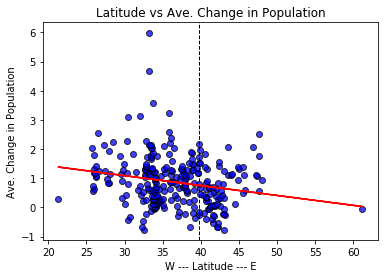

In [10]:
lat = population_latlon['Lat']
ave_change = population_latlon['Ave. Change']

plt.scatter(lat, ave_change, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.axvline(39.8, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("W --- Latitude --- E")
plt.ylabel("Ave. Change in Population")
plt.title("Latitude vs Ave. Change in Population")

(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, ave_change)
regress_values = lat * slope + intercept
plt.plot(lat,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/lat_vs_ave_change.png")

The r-squared is: -0.11708320735791135


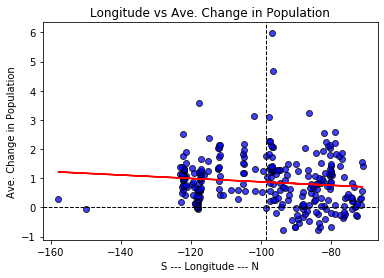

In [11]:
lon = population_latlon['Lng']
ave_change = population_latlon['Ave. Change']

plt.scatter(lon, ave_change, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.axvline(-98.5, color='k', linestyle='dashed', linewidth=1)
plt.axhline(0, color='k', linestyle='dashed', linewidth=1)
plt.xlabel("S --- Longitude --- N")
plt.ylabel("Ave. Change in Population")
plt.title("Longitude vs Ave. Change in Population")

(slope, intercept, rvalue, pvalue, stderr) = linregress(lon, ave_change)
regress_values = lon * slope + intercept
plt.plot(lon,regress_values,"r-")
print(f"The r-squared is: {rvalue}")
plt.savefig("Images/lon_vs_ave_change.png")